# 1) Undirected Graphs

In [81]:
import networkx as nx

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Paris', 'Dublin'), ('Milan', 'Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)

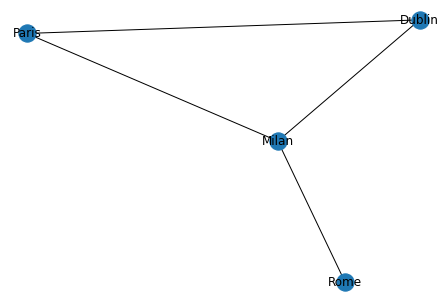

In [82]:
nx.draw(G, with_labels=True)

In [83]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Rome', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome')]


In [84]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree of nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbours for nodes { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree of nodes: {'Dublin': 2, 'Milan': 3, 'Rome': 1, 'Paris': 2}
Neighbours for nodes {'Dublin': ['Milan', 'Paris'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan'], 'Paris': ['Milan', 'Dublin']}


In [85]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Milan', 'Rome', 'Paris']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome')]


In [86]:
# Add new nodes and edges
new_nodes = {'London', 'Madrid'}
new_edges = {('London', 'Rome'), ('Madrid', 'Paris')}
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Rome', 'Paris', 'London', 'Madrid']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Rome', 'London'), ('Paris', 'Madrid')]


In [87]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Rome', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome')]


The above also automatically removes edges that contain the removed nodes from the edge list.

In [88]:
node_edges = [('Milan', 'Dublin'), ('Milan', 'Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Rome', 'Paris']
E = [('Dublin', 'Paris'), ('Milan', 'Rome')]


# 2) Directed Edges

-  (v<sub>k</sub>, v<sub>w</sub>) means node v<sub>k</sub> goes into v<sub>w</sub>, which is different from (v<sub>w</sub>, v<sub>k</sub>)
-  (v<sub>w</sub>, v<sub>k</sub>) means node v<sub>w</sub> will go into v<sub>k</sub>.
    -  v<sub>w</sub> is called the *head*
    -  v<sub>k</sub> is called the *tail*
  
-  **Indegree**: Number of heads adjacent to head end of v. *deg*<sup>-</sup>(v)
    -  Number of edges going inwards to a node
-  **OutDegree**: Number of tail ends adjacent to v. *deg*<sup>+</sup>(v)
    -  Number of edges going outwards from a node

In [89]:
G = nx.DiGraph() # for directed graphs
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

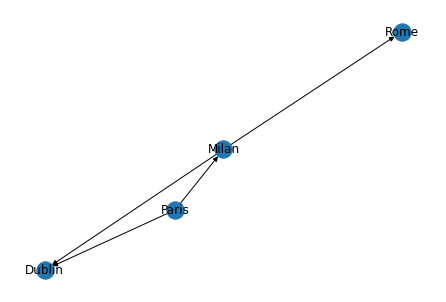

In [90]:
nx.draw(G, with_labels=True)

In [91]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outdegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dublin': 2, 'Milan': 1, 'Rome': 1, 'Paris': 0}
Outdegree for nodes: {'Dublin': 0, 'Milan': 2, 'Rome': 0, 'Paris': 2}


# Multigraph
Generalisation which allows multiple edges to have same pair of start and end nodes. 

**multigraph G** defined as `G=(V,E)` where V is a set of nodes and E is a multi-set (a set allowing multiple instances for each of its elements) of edges. This can be a **directed multigraph** if E is a multi-set of ordered couples, otherwise is **undirected multigraph** if E is a multi-set of two-sets.

In [92]:
directed_multi_graph = nx.MultiDiGraph()
undirected_multi_graph = nx.MultiGraph()
v = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome'), ('Milan', 'Rome')]
directed_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)
undirected_multi_graph.add_edges_from(E)

[0, 1, 0, 0, 0, 1]

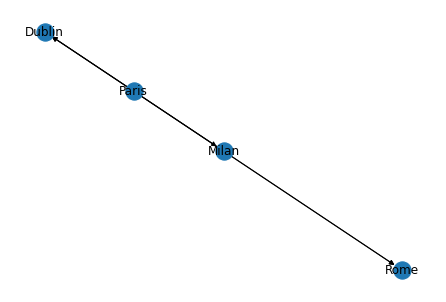

In [93]:
nx.draw(directed_multi_graph, with_labels=True)

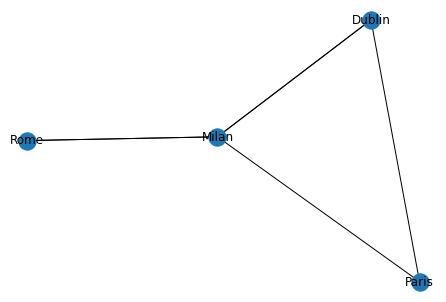

In [94]:
nx.draw(undirected_multi_graph, with_labels=True)

## Weighted Edges

-  **edge-weighted graph** (weighted graph) G is defined as *G=(V,E,w)* where V is a set of nodes, E is a set of edges, and w:E -> ${\rm I\!R}$ is a weighted function that assigns at each edge e $ \in $ E a weight expressed as a real number.
-  **node-weighted graph** G is defined as *G=(V,E,w)* where V is a set of nodes, E is a set of edges and w:V -> ${\rm I\!R}$ is the weighted function that assigns each node v $ \in $ V a weight expressed as a real number.

Note:
-  If E is a set of ordered couples, then we call it a **directed weighted graph**
-  If E is a set of two-sets, then we call it a **undirected weighted graph**
-  If E is a multi-set, then we call it a **weighted multigraph (directed weighted multigraph)**
-  If E is a multi-set of ordered couples, it is an **undirected weighted multigraph**

In [95]:
# Generate a directed weighted graph
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin', 19), ('Paris', 'Milan', 8), ('Paris', 'Dublin', 11), ('Milan', 'Rome', 5)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

{('Milan', 'Dublin'): Text(-0.3271822705316385, 0.09051482136147249, '19'),
 ('Milan', 'Rome'): Text(0.4719203590009894, -0.1305564534148253, '5'),
 ('Paris', 'Milan'): Text(-0.20089737046737224, 0.05557810247494181, '8'),
 ('Paris', 'Dublin'): Text(-0.47192035900098944, 0.13055645341482536, '11')}

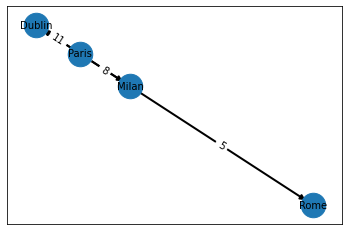

In [96]:
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

nx.draw_networkx_nodes(G, pos, node_size=600)
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

### Bipartite Graphs

In [97]:
import pandas as pd
import numpy as np

n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 == 0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 == 1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges)
)
edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])
display(edges.sample(2))

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

,source,target
0,2,1
8,2,7


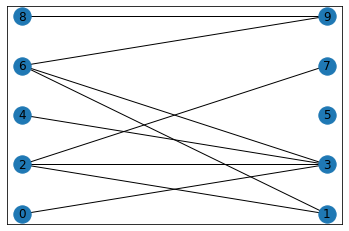

In [98]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

### Representing Edges

In [99]:
nx.to_pandas_adjacency(G) # adjacency matrix as pandas dataframe

,Dublin,Milan,Rome,Paris
Dublin,0.0,0.0,0.0,0.0
Milan,19.0,0.0,5.0,0.0
Rome,0.0,0.0,0.0,0.0
Paris,11.0,8.0,0.0,0.0


In [100]:
nx.to_numpy_matrix(G) # adjacency matrix as numpy matrix; same order as G.nodes list

matrix([[ 0.,  0.,  0.,  0.],
        [19.,  0.,  5.,  0.],
        [ 0.,  0.,  0.,  0.],
        [11.,  8.,  0.,  0.]])

In [101]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,Milan,Dublin,19
1,Milan,Rome,5
2,Paris,Milan,8
3,Paris,Dublin,11


In [102]:
nx.to_dict_of_dicts(G)

{'Dublin': {},
 'Milan': {'Dublin': {'weight': 19}, 'Rome': {'weight': 5}},
 'Rome': {},
 'Paris': {'Milan': {'weight': 8}, 'Dublin': {'weight': 11}}}

In [103]:
nx.to_numpy_array(G)

array([[ 0.,  0.,  0.,  0.],
       [19.,  0.,  5.,  0.],
       [ 0.,  0.,  0.,  0.],
       [11.,  8.,  0.,  0.]])

### Plotting Graphs

In [104]:
def draw_graph(G, nodes_position, weight):
    nx.draw(G, nodes_position, with_labels=True, font_size=15, node_size=400, edge_color='gray', arrowsize=30)
    if weight:
        edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, nodes_position, edge_labels=edge_labels)

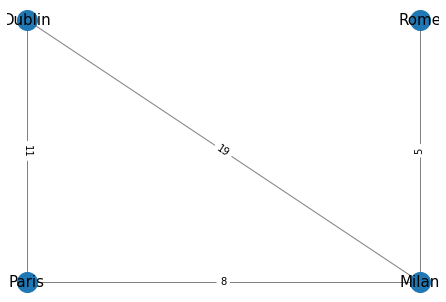

In [105]:
G = nx.Graph()
V = {'Paris', 'Dublin', 'Milan', 'Rome'}
E = [('Paris', 'Dublin', 11), ('Paris', 'Milan', 8), ('Milan', 'Rome', 5), ('Milan', 'Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
node_position = {'Paris': [0,0], 'Dublin': [0,1], 'Milan':[1,0], 'Rome':[1,1]}
draw_graph(G, node_position, True)

There are several different node positions:
-  nx.circular_layout(), bipartite_layout(), kamada_kawai_layout(), etc..

## Graph Properties
- **Integration metrics**: How nodes tend to be interconnected with each other.
- **Segregation metrics**: Quantify presence of groups of interconnected nodes, known as communities/modules within a network
- **Centrality metrics**: Assess importance of individual nodes inside a network.
- **Resilience metrics**: How much a network can maintain/adapt its operational performance when facing failures or other adverse conditions.

These metrics are global (overall network), whereaslocal measure individual network elements. The above properties may not account for edge weights in weighted graphs, so we have **weighted and unweighted metrics**.

- **distance**: Number of edges to traverse in order to reach a target node from a given source node.
- **diameter**: Longest shortest path among all possible shortest paths.

In [106]:
# compute shortest path between two notes on a graph
G = nx.Graph()
nodes = {1: 'Dublin', 2: 'Paris', 3: 'Milan', 4: 'Rome', 5: 'Naples', 6: 'Moscow', 7: 'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (6,7), (7,5)])

path = nx.shortest_path(G, source=1, target=7)
path

[1, 3, 4, 5, 7]

**characteristic path length**: Average of all the shortest path lengths between all possible pair of nodes. <br>
This is a commonly used measure of how efficiently information is spread across a network. Networks having shorter characteristic path lengths promote quick transfer of information and reduce costs.

However, sometimes it is not possible to compute a path between all nodes in a *disconnected* graph, so for that we use **network efficiency**.

In [107]:
# compute characteristic path length with networkx
nx.average_shortest_path_length(G)

2.1904761904761907

-  **global efficiency**: Average of the inverse (1/) shortest path length for all pairs of nodes. Can measure how efficiently information is exchanged across a network. Efficiency is at a max when graph is fully connected, whilst minimal for disconnected graph. Shorter path has a lower measure.
-  **local efficiency**: Considering only neighbourhood of node in calculation, without the node itself.

In [108]:
nx.global_efficiency(G)

0.611111111111111

In [109]:
# average local efficiency
nx.local_efficiency(G)

0.6666666666666667

In a fully connected graph, each node can be reached by another so information exchange is rapid. However if we have a 'circular' graph, many nodes must be traversed to reach the target making it less efficient. **Segregation** metrics will tell us more about the presence of groups.

**Clustering Coefficient**: Measure of how much nodes cluster together. Defined as fraction of triangles around a node, equivalent to the fraction of the node's neighbours that are neighbours of each other.

In [110]:
# global clustering coefficient
nx.average_clustering(G)

0.6666666666666667

In [111]:
# local clusering coefficient
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

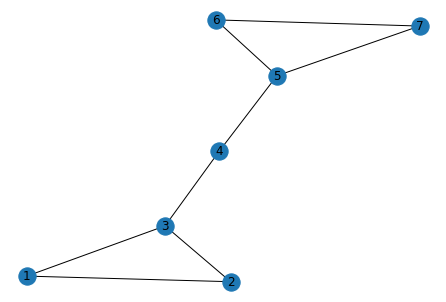

In [112]:
nx.draw(G, with_labels=True)

**Transitivity**: Ratio between observed number of **closed triplets** (complete subgraph with three nodes and two edges) and max number of closed triplets in graph.

In [113]:
nx.transitivity(G)

0.5454545454545454

**Modularity**: Quantify division of a network in aggregated sets of highly interconnected nodes. High modular show dense connections within module and sparse connections between.

In [114]:
# compute modularity from algorithms
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, communities=[{1,2,3}, {4,5,6,7}]) # communities is a list of sets

0.3671875

Each node in a graph has its *own importance*, and we can quantify it using **centrality metrics**.


**Degree Centrality**: Directly connected with the *degree* of a node, measuring number of incident edges on a certain node *i*. More connected means a higher degree centrality. If directed, we may consider the **in-degree centrality** and **out-degree centrality** for each node related to the *incoming* and *outgoing* edges respectively.

In [115]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

**Closeness Centrality**: Quantify how much a node is close (well connected) to other nodes. Average distance of a node *i* to all other nodes in the network. 1/(sum of the shortestdistances between all nodes i and j)

In [116]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

**Betweenness centrality**: Measures how much a node acts as a bridge between other nodes. So even a node poorly connected can help to keep the whole network connected. 
Ratio of shortest paths that go through node i against the total number of shortest paths between two nodes. The higher the number of shortest paths go through node i, the higher the betweenness centrality. 

Centrality metrics tell us how important a node is to a network.

In [117]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

**Resilience Metrics**

**Assortativity Coefficient**: Tendency of nodes being connected to similar nodes. One such way is to use **pearson correlation coefficient** between degrees of directly connected nodes (nodes on two opposite ends of a link). Coefficient assumes positive values when there is a correlation between nodes of a similar degree, and negative values when correlation between nodes of a different degree.

In [118]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

More networkx algorithms can be found here: https://networkx.org/documentation/stable/reference/algorithms/

### Benchmarks & Repositories

In [119]:
# fully connected undirected graph
complete = nx.complete_graph(n=7)

A fully connected subgraph of *n* nodes within a larger graph is generally referred to as a **clique** of size n. In a clique, every two distinct vertices in the subset are adjacent (fully connected induced subraph).

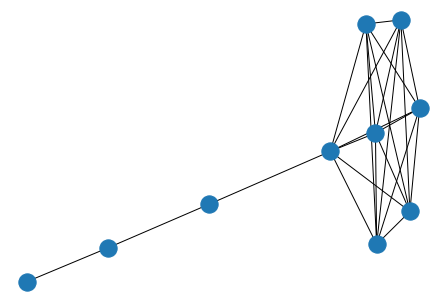

In [121]:
# lollipop graph of clique size n and branch of m nodes
lollipop = nx.lollipop_graph(m=7, n=3)
nx.draw(lollipop)

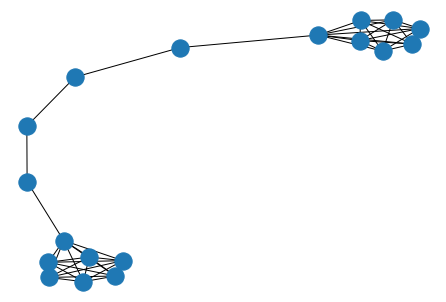

In [122]:
# barbell two cliques of size m1 and m2 joined by a branch of nodes
barbell = nx.barbell_graph(m1=7, m2=4)
nx.draw(barbell)

In [123]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

# merge everything into a single graph and connect random edges
allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

### Some Random Graphs
These have been used to generate benchmarks and synthetic graphs, going through some:
-  **Watts and Strogatz**: Generated by displacing n nodes in a ring and connecting each node with it's k neighbours. Each edge has probability p of being rewired to some random nodes. Can vary (p=0) for regular network and (p=1) for random network. 

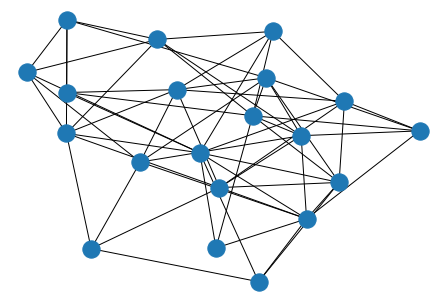

In [131]:
graph = nx.watts_strogatz_graph(n=20, k=6, p=0.4)
nx.draw(graph)

-  **Barbasi Albert**: Preferential attachment, new nodes are progressively added by attaching to already existing nodes, with preference for nodes that have more neighbours. So more likely to attach to nodes with already higher degrees. This means that nodes follow a power-law distribution and see the emergence of *hubs*, where a popularity of a node influences more nodes rather than how many it already has.

dict_values([12, 8, 1, 1, 6, 9, 3, 1, 2, 4, 5, 2, 1, 3, 2, 9, 6, 3, 3, 4, 6, 2, 3, 3, 3, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Counter({1: 59, 2: 23, 3: 8, 4: 6, 5: 3, 6: 1})


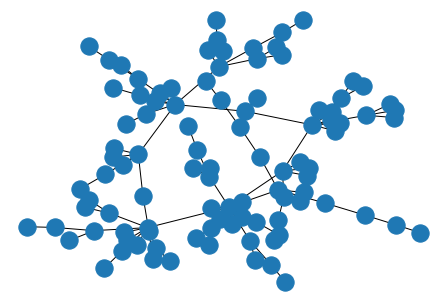

In [139]:
ba_model = nx.extended_barabasi_albert_graph(100, m=1, p=0, q=0)
nx.draw(ba_model)

from collections import Counter
degree = dict(nx.degree(ba_model)).values()
print(degree)
bins = np.round(np.logspace(np.log10(min(degree)),10 ))
cnt = Counter(np.digitize(np.array(list(degree)), bins))
print(cnt)

### Data Repistories
- http://networkrepository.com/
- **Stanford Network Analysis Platform** (SNAP)
-  **Open Graph Benchmark** (OGB)

In [143]:
!ls ./data/astro-ph

astro-ph.mtx  readme.html


In [147]:
from scipy.io import mmread
adj_matrix = mmread('./data/astro-ph/astro-ph.mtx')
graph = nx.from_scipy_sparse_matrix(adj_matrix)

In [ ]:
# takes too long to run so we will put in but running it is another matter
stats = pd.DataFrame({
    "centrality": nx.centrality.betweenness_centrality(graph), 
    "C_i": nx.clustering(graph),
    "degree": nx.degree(graph)
})

In [ ]:
neigbours = [n for n in nx.neighbors(graph, 6933)]
sampling = 10

In [ ]:
# select neighbours with the largest C_i values (clustering)
nTop = round(len(neigbours) * sampling)
idx = {
    "random": stats.loc[neigbours].sort_index().index[:nTop],
    "centrality": stats.loc[neigbours].sort_values('centrality', ascending=False).index[:nTop],
    "C_i": stats.loc[neigbours].sort_values("C_i", ascending=False).index[:nTop]
}

In [ ]:
def plotSubgraph(graph, indices, center=6933):
    nx.draw_kamada_kawai(
        nx.subgraph(graph, list(indices) + [center])
    )
plotSubgraph(graph, idx["random"])

In [ ]:
# to read edgelist
g = nx.read_edgelist("Amazon0302.txt")

Testing SNAP

In [158]:
from snap import LoadEdgeList, PNGraph
graph = LoadEdgeList(PNGraph, "./data/amazon0302.txt", 0, 1, '\t')


In [ ]:
# convert to networkx and vice-versa
networkx_graph = snap2network(snap_graph)
snap_graph = networkx2snap(networkx_graph)